# WHAT IS EDA?

EDA stands for Exploratory data analysis.In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

# WHAT IS THE PROJECT?

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign

# STEP 1-IMPORTING THE NECESSARY LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
import seaborn as sns
sns.set(style="ticks")

# 1.1 LOADING THE DATA INTO THE DATAFRAME

In [3]:
df=pd.read_excel("D:\internshipstudio\project\Bank_Personal_Loan_Modelling.xlsx","Data")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Showing the first 5 rows

In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Showing the last 5 rows

# 1.2 CHECKING THE COLUMNS

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# 1.3 CALCULATING SHAPE OF EXCEL DATASET

In [7]:
print(df.shape)

(5000, 14)


TOTAL ROWS=5000
TOTAL COLUMNS=14

# 1.4 CHECKING NULL VALUES FOR THE EXCEL DATASET

In [8]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

WE CALCULATED NULL VALUES FOR ID,AGE....WE GOT BOOL_SERIES=0 FOR EACH COLUMNS .IT MEANS DATASET DOES NOT CONTAIN ANY NULL VALUES.

# 1.5 CHECKING DATATYPE OF EACH COLUMN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

# 1.6 STATISTICAL SUMMARY

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The transpose() function is used to transpose index and columns. Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.

#  STEP 2 - DATA CLEANING

# 2.1 CHECKING THE DUPLICATE ROWS

In [11]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows.shape)

(0, 14)


The dataframe does not contain any duplicate rows

# 2.2 DROPPING THE MISSING OR NULL VALUES

In [12]:
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


There is no null values

In [13]:
df=df.dropna()
df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

There is no missing values

# 2.3 MANAGING THE EXPERIENCE WITH NEGATIVE VALUE

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Since the min value of Experience is -3 we will update it

In [15]:
df[df['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience. Before proceeding any further we need to clean the same

In [16]:
dfExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist()

 getting the customer ID who has negative experience

In [17]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

there are 52 records with negative experience

In [18]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

The above code does the below steps:

For the record with the ID, get the value of Age column
For the record with the ID, get the value of Education column
Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
Apply the median back to the location which had negative experience

In [19]:
df[df['Experience'] < 0]['Experience'].count()

0

checking if there are records with negative experience

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# 2.4 DROPPING IRRELEVANT COLUMNS

In [21]:
exp=df["Experience"]
age=df["Age"]
correlation=exp.corr(age)
print(correlation)

0.9941593220099935


In [22]:
df1=df.drop(["Experience","ID"],axis=1)
df1

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


Dropped the irrelevant column Experience and ID

# 2.5 DETECTING OUTLIERS

Outliers are extreme values that fall a long way outside of the other observations. For example, in a normal distribution, outliers may be values on the tails of the distribution.

The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

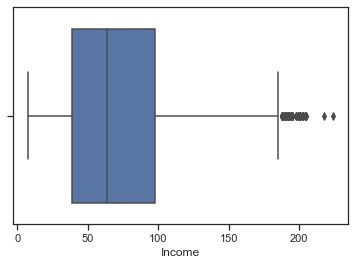

In [23]:
sns.boxplot(x=df['Income'])

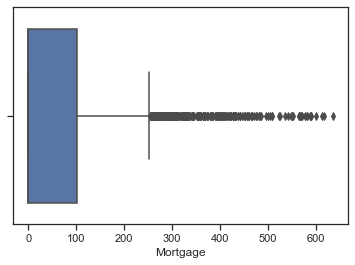

In [24]:
sns.boxplot(x=df['Mortgage'])

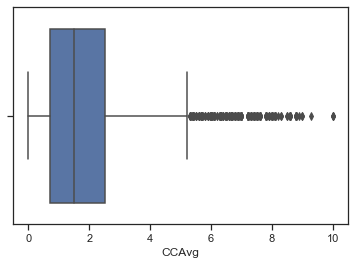

In [25]:
sns.boxplot(x=df['CCAvg'])

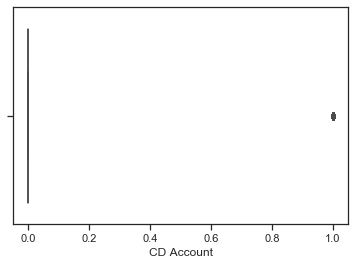

In [26]:
sns.boxplot(x=df['CD Account'])

In [27]:
df[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

NameError: name 'continuous_val' is not defined

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering

In [ ]:
sns.pairplot(df.iloc[:,1:])

From the pair plot we can see that-

1.Age and Experience both have high correlation which each other.

2.Income,CCAvg,Mortage show positive skewness.

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering.

In [28]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age                     20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [29]:
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR ))).any(axis = 1)]
df1.shape

(3645, 12)

# STEP 3 -EDA

# 3.1 CALCULATING UNIQUE VALUES IN EACH COLUMN

In [30]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              45
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# 3.2 Number of people with zero mortgage?

In [31]:
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

# 3.3 Number of people with zero credit card spending per month?

In [32]:
df[df['CCAvg'] == 0]['CCAvg'].count()

106

# 3.4 Value counts of all categorical columns.

In [33]:
unique_value=0
unique_value+= df[:].nunique() 
print(unique_value.sum())

6190


# 3.5 Univariate and Bivariate analysis

# Counting the number of people who took personal loans

In [34]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

0 represents he does not took loan
1 represents he does took loan

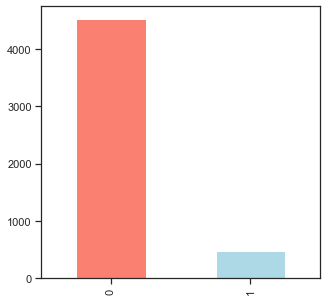

In [35]:
plt.figure(figsize=(5,5))
df["Personal Loan"].value_counts().plot(kind="bar",color=['salmon','lightblue'])

0 represents he does not took loan
1 represents he does took loan

# Influence of various metrics on personal loans

In [36]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
    print('=================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

ID : [   1    2    3 ... 4998 4999 5000]
Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience : [ 1. 19. 15.  9.  8. 13. 27. 24. 10. 39.  5. 23. 32. 41. 30. 14. 18. 21.
 28. 31. 11. 16. 20. 35.  6. 25.  7. 12. 26. 37. 17.  2. 36. 29.  3. 22.
 34.  0. 38. 40. 33.  4. nan 42. 43.]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 

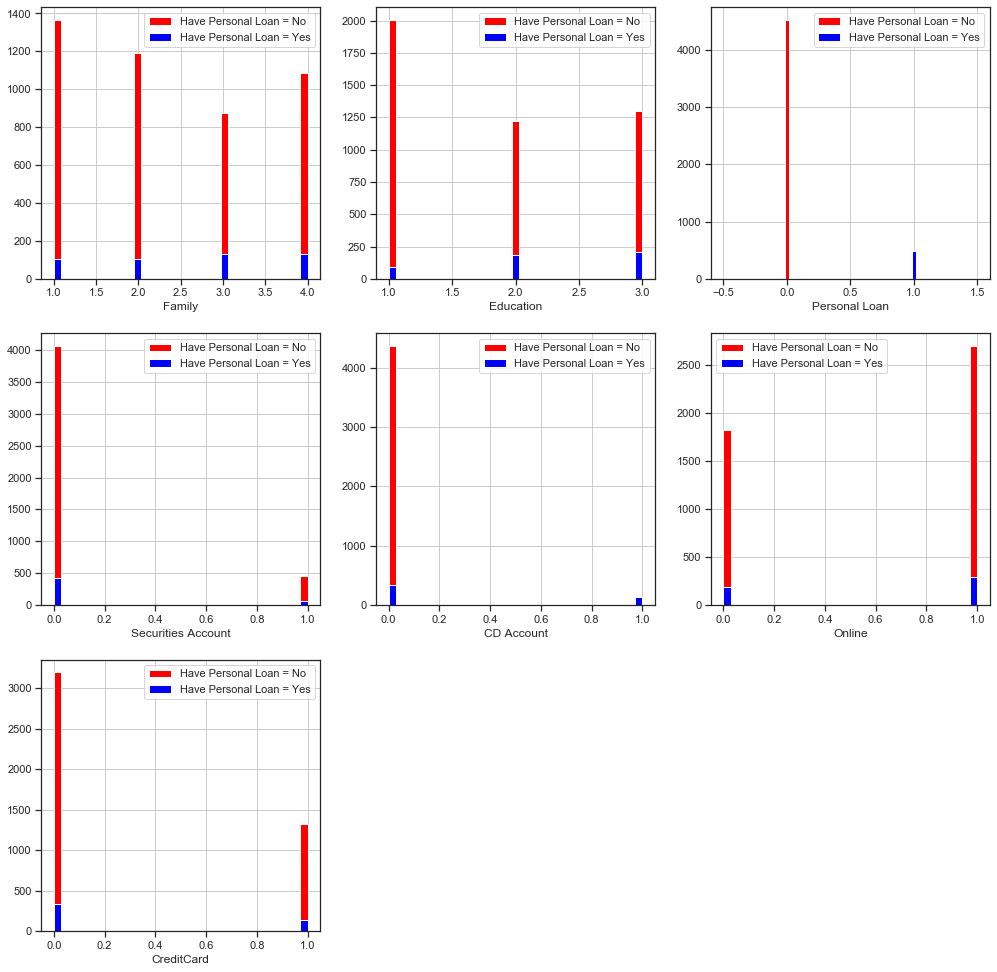

In [37]:
plt.figure(figsize=(17,17))
for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["Personal Loan"]==0][column].hist(bins=35,color='red',label='Have Personal Loan = No')
    df[df["Personal Loan"]==1][column].hist(bins=35,color='Blue',label="Have Personal Loan = Yes")
    plt.legend()
    plt.xlabel(column)

Form the above histogram chart we can see that-

1.Family size of 3 and 4 members are tending to take Personal Loan.

2.Customer that belong to Education category 2 and 3 i.e. Graduate and Professional have taken more Persoanl Loan then the Undergraduate class.

3.Customer who does not have Security Account have taken Personal Loan .

4.Customer who does not CDAcount in this higher number of customer don't have Personal Loan . We can see that customer who have CDAcount most of them had taken Personal Loan. Here CDAccount means Certificate of Deposit.

5.Customer how use Internet Bank service also have higher count of Personal Loan then those who does not use Online Service.
Customer who don't have excess to Credit Card for Universal Bank are more likely to apply for PersonaL Loan.

# Influence of income and education on personal loan

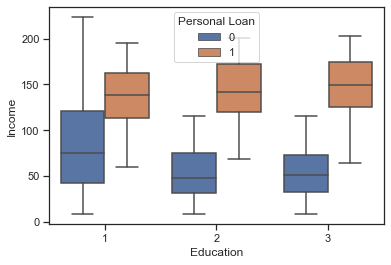

In [38]:
sns.boxplot( x=df["Education"], y=df["Income"],hue=df["Personal Loan"]);
plt.show()

 It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

# Influence of education and mortgage on personal loan

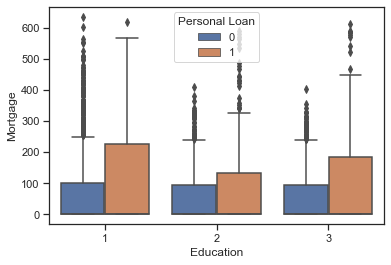

In [39]:
sns.boxplot( x=df["Education"], y=df["Mortgage"],hue=df["Personal Loan"]);
plt.show()

 From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

# Influence of SecuritiesAccount on personal loan

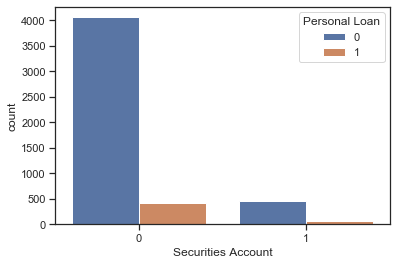

In [40]:
sns.countplot( x=df["Securities Account"],hue=df["Personal Loan"]);
plt.show()

Majority of customers who does not have loan have securities account

# Influence of family on personal loan

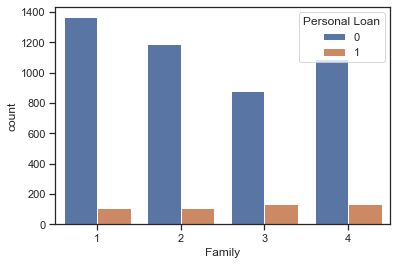

In [41]:
sns.countplot( x=df["Family"],hue=df["Personal Loan"]);
plt.show()

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

# Income Vs Age

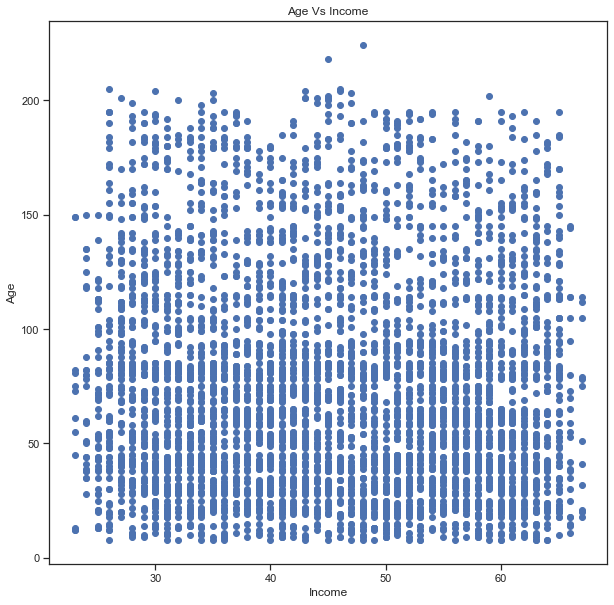

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Income'])
plt.ylabel('Age')
plt.xlabel('Income')
plt.title('Age Vs Income')
plt.show()

# Influence of CDAccount on personal loan

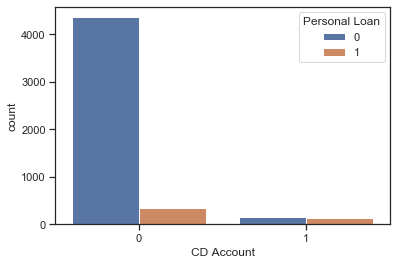

In [43]:
sns.countplot( x=df["CD Account"],hue=df["Personal Loan"]);
plt.show()

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

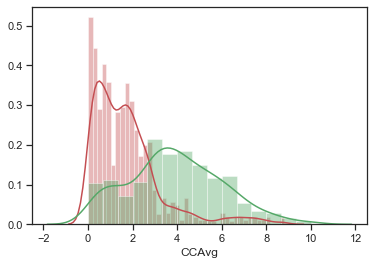

In [44]:
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [45]:
print('Credit card spending of Non-Loan customers: ',df[df["Personal Loan"]==0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ',df[df["Personal Loan"]==1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

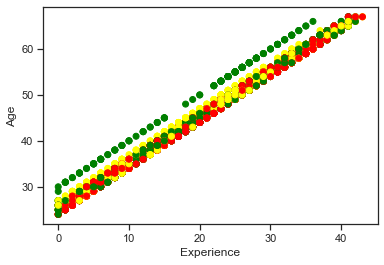

In [46]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

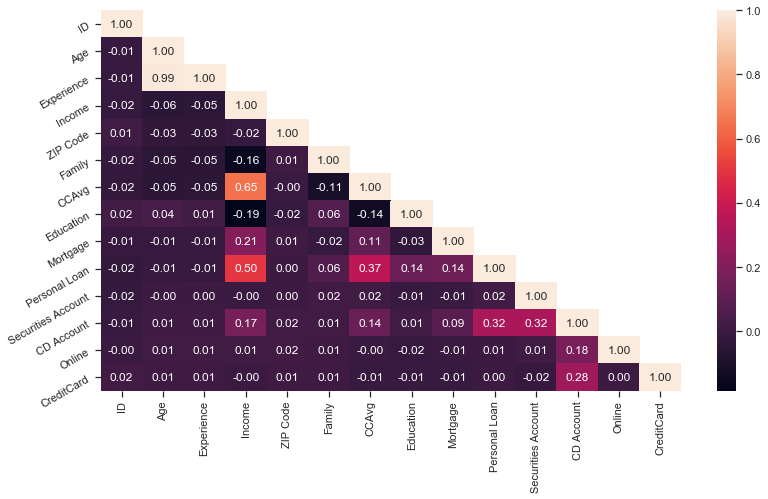

In [47]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

# Influence of Family and Income on personal loan

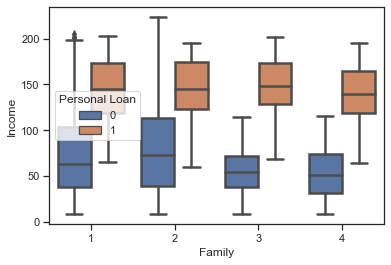

In [48]:
sns.boxplot( x=df["Family"], y=df["Income"],hue=df["Personal Loan"]);
plt.show()

Looking at the below above, families with income less than 100K are less likely to take loan,than families with high income

# STEP 4 - TRANSFORMATION OF FEATURE VARIABLES

ID               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Income           AxesSubplot(0.125,0.391471;0.227941x0.222059)
ZIP Code      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CCAvg         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Mortgage            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

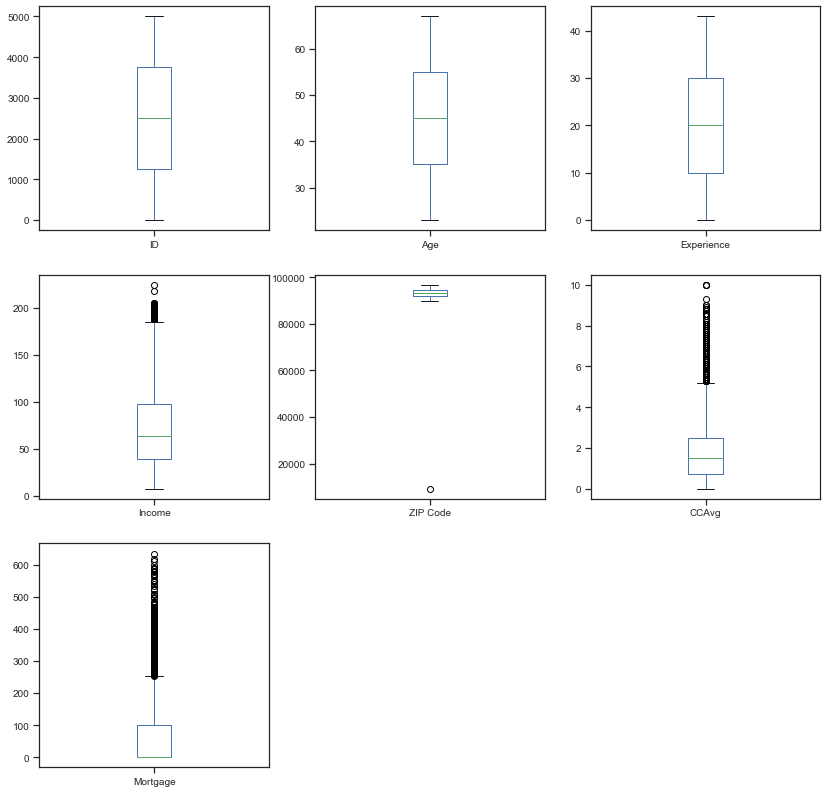

In [49]:
df[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering

Now we had outlier in our data set.To treat them we will be replacing all those data points whole value less than equal to LL=(Q1-1.5IQR) and greater than equal to UL=(Q3+1.5IQR) by LL and UL.This is known as Capping Method

In [50]:
Outlier = ['Income', 'CCAvg', 'Mortgage']
Q1=df[Outlier].quantile(0.25)
Q3=df[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    df[i][df[i]>UL[i]]=UL[i];df[i][df[i]<LL[i]]=LL[i] 

c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Income           AxesSubplot(0.125,0.391471;0.227941x0.222059)
ZIP Code      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CCAvg         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Mortgage            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

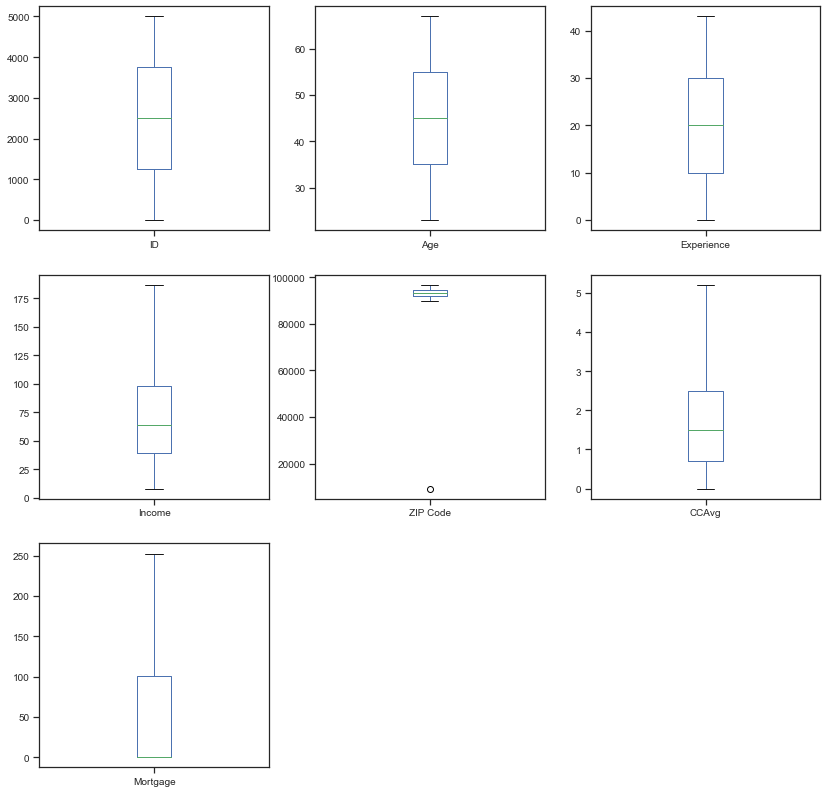

In [51]:
df[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

Now we can see that now we do not have any outlier in data set.

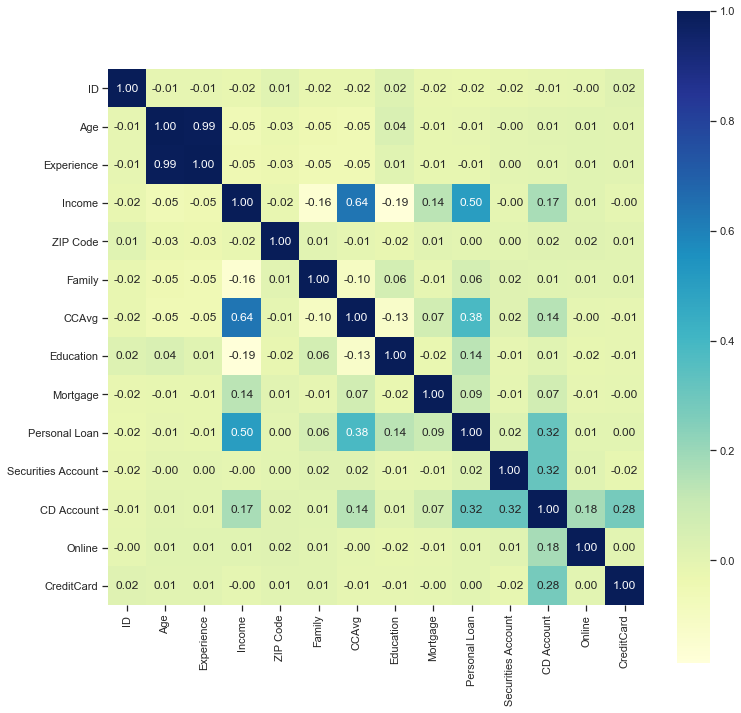

In [52]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")

# STEP 5 - SPLITTING DATA INTO TEST AND TRAIN DATA

In [53]:
testing=df.drop(['ID','Experience','Personal Loan'],axis=1)
testing

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49.0,91107,4,1.6,1,0.0,1,0,0,0
1,45,34.0,90089,3,1.5,1,0.0,1,0,0,0
2,39,11.0,94720,1,1.0,1,0.0,0,0,0,0
3,35,100.0,94112,1,2.7,2,0.0,0,0,0,0
4,35,45.0,91330,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40.0,92697,1,1.9,3,0.0,0,0,1,0
4996,30,15.0,92037,4,0.4,1,85.0,0,0,1,0
4997,63,24.0,93023,2,0.3,3,0.0,0,0,0,0
4998,65,49.0,90034,3,0.5,2,0.0,0,0,1,0


In [54]:
x=testing
y=df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

Dividing dataset into testing(30%) and training data(70%)

# STEP 6 - APPLYING LOGISTIC REGRESSION TO PREDICT

# 1.LOGISTIC REGRESSION

Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.

In [56]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x,y)
print(model1.score(x_test,y_test))
y_predict=model1.predict(x_test)
y_predict

0.942


c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# STEP 7 - METRICS FOR EVALUATING PERFORMANCE FOR LOGISTIC REGRESSION

# INPUT METRICS

In [57]:
print(x.columns)

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


# OUTPUT METRICS

In [58]:
output=y
output=output.to_frame()
output.columns

Index(['Personal Loan'], dtype='object')

In [59]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.058
Root Mean Squared Error 0.24083189157584592
R2 Score 0.384538474598653


# STEP 8 - APPLYING OTHER CLASSIFICATION ALGORITHMS

# 8.1 DECISION TREE CLASSIFIER

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [60]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x,y)
print(model2.score(x_test,y_test))

0.9813333333333333


In [61]:
y_predict=model2.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [62]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.018666666666666668
Root Mean Squared Error 0.13662601021279466
R2 Score 0.8019204286064631


# 8.2 NAIVE BAYES

Definition: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

Disadvantages: Naive Bayes is is known to be a bad estimator.

In [63]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x, y)
print(model3.score(x_test,y_test))

0.8973333333333333


In [64]:
y_predict=model3.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [65]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10266666666666667
Root Mean Squared Error 0.3204163957519444
R2 Score -0.08943764266445342


# 8.3 RANDOM FOREST CLASSIFIER

Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [66]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=2, random_state=10)
model4.fit(x,y)
print(model4.score(x_test,y_test))

0.9066666666666666


In [67]:
y_predict=model4.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.09333333333333334
Root Mean Squared Error 0.30550504633038933
R2 Score 0.009602143032315102


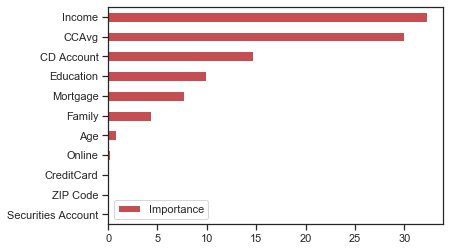

In [69]:
Importance = pd.DataFrame({'Importance':model4.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

# 8.4 KNN

Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
model5.fit(x,y)
print(model5.score(x_test,y_test))

0.8946666666666667


In [71]:
y_predict=model5.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10533333333333333
Root Mean Squared Error 0.3245509718570156
R2 Score -0.11773472429210141


# 8.5 STOCHASTIC GRADIENT DESCENT

Definition: Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

Advantages: Efficiency and ease of implementation.

Disadvantages: Requires a number of hyper-parameters and it is sensitive to feature scaling.

In [80]:
from sklearn.linear_model import SGDClassifier
model6=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
model6.fit(x,y)
print(model6.score(x_test,y_test))

0.8986666666666666


In [81]:
y_predict=model6.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10133333333333333
Root Mean Squared Error 0.3183289703016886
R2 Score -0.0752891018506292


# 8.6 SUPPORT VECTOR CLASSIFIER

Definition: Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

Advantages: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

Disadvantages: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [84]:
from sklearn.svm import SVC
model7 = SVC(kernel='linear')
model7.fit(x, y)
print(model6.score(x_test,y_test))

0.8986666666666666


In [85]:
y_predict=model7.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.09533333333333334
Root Mean Squared Error 0.3087609647175843
R2 Score -0.011620668188421002


In [87]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVC',  SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:76

LR: 0.915600 (0.015409)
DT: 0.982000 (0.004382)


c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.899200 (0.009261)
RF: 0.986400 (0.004543)


c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.902000 (0.010198)


# ALGOLITHMS COMPARISON

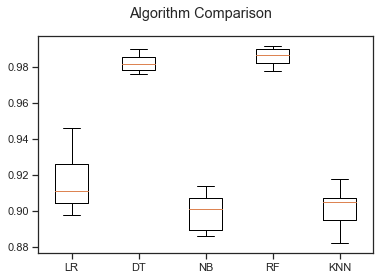

In [88]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A box plot is a graphical representation of statistical data based on the minimum, first quartile, median, third quartile, and maximum. The term “box plot” comes from the fact that the graph looks like a rectangle with lines extending from the top and bottom. Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.

# STEP 9 - BUSINESS UNDERSTANDING OF THE MODEL

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
LR: 0.912200 
DT: 0.982000
NB: 0.885600 
RF: 0.906200 
KNN:0.898600 

From the above result,it is clear that Decision Tree Algorithm is the best algorithm for predicting whether the customer will opt for personal loans.